In [1]:
# 가로로 넓게 쓰기
from IPython.core.display import display, HTML  
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_54619/2125492085.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import darts
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset
from darts.dataprocessing.transformers import Scaler
from darts.models import NBEATSModel

from darts.metrics import mape

import matplotlib.pyplot as plt
%matplotlib inline

print("Setup Complete")

Setup Complete


In [3]:
AirPassengersDataset().load()

MonthlyMilkDataset().load()

<TimeSeries (DataArray) (Month: 168, component: 1, sample: 1)>
array([[[589.]],

       [[561.]],

       [[640.]],

       [[656.]],

       [[727.]],

       [[697.]],

       [[640.]],

       [[599.]],

       [[568.]],

       [[577.]],

...

       [[892.]],

       [[903.]],

       [[966.]],

       [[937.]],

       [[896.]],

       [[858.]],

       [[817.]],

       [[827.]],

       [[797.]],

       [[843.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1962-01-01 1962-02-01 ... 1975-12-01
  * component  (component) object 'Pounds per cow'
Dimensions without coordinates: sample

In [4]:
display("Air Passanger Dataset",AirPassengersDataset().load().pd_dataframe())

display("Monthly Milk Dataset",MonthlyMilkDataset().load().pd_dataframe())

'Air Passanger Dataset'

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


'Monthly Milk Dataset'

component,Pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [5]:
air_series = AirPassengersDataset().load()
milk_series = MonthlyMilkDataset().load()

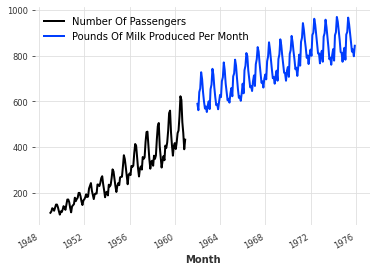

In [6]:
air_series.plot(label='Number Of Passengers')
milk_series.plot(label='Pounds Of Milk Produced Per Month')
plt.legend()

In [7]:
scaler_air, scaler_milk = Scaler(), Scaler()

In [8]:
air_series_scaled = scaler_air.fit_transform(air_series)
milk_series_scaled = scaler_milk.fit_transform(milk_series)

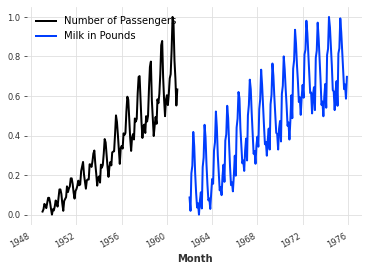

In [9]:
air_series_scaled.plot(label='Number of Passengers')
milk_series_scaled.plot(label='Milk in Pounds')
plt.legend();

In [10]:
air_series_train, air_series_val = air_series_scaled[:-36], air_series_scaled[-36:]
milk_series_train, milk_series_val = milk_series_scaled[:-36], milk_series_scaled[-36:]

In [11]:
type(air_series_train)

darts.timeseries.TimeSeries

In [12]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=42)

In [13]:
model.fit([air_series_train, milk_series_train], verbose=True)

[2022-05-13 19:23:23,963] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2022-05-13 19:23:23,963] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
2022-05-13 19:23:23 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 194 samples.
[2022-05-13 19:23:24,000] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-13 19:23:24,000] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-13 19:23:24 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
[2022-05-13 19:23:24,001] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightnin

Training: 0it [00:00, ?it/s]

In [14]:
pred_air = model.predict(n=36, series=air_series_train)
pred_milk = model.predict(n=36, series=milk_series_train)

Predicting: 7it [00:00, ?it/s]

Predicting: 7it [00:00, ?it/s]

In [15]:
print("MAPE = {:.2f}%".format(mape(air_series_scaled, pred_air)))
print("MAPE = {:.2f}%".format(mape(milk_series_scaled, pred_milk)))

MAPE = 6.56%
MAPE = 28.32%


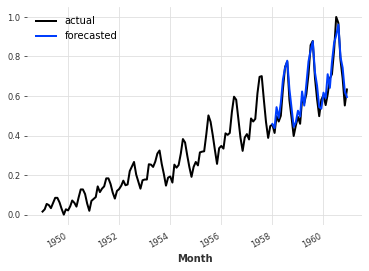

In [16]:
air_series_scaled .plot(label = "actual")
pred_air.plot(label = "forecasted") # validation data set
plt.legend()

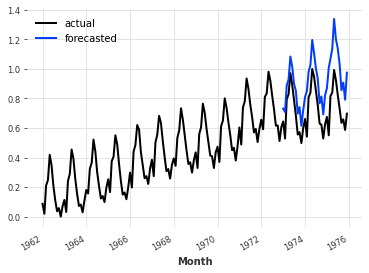

In [17]:
milk_series_scaled.plot(label = "actual")

pred_milk.plot(label = "forecasted") # validation data set

plt.legend()